<a href="https://colab.research.google.com/github/Sanjay05-coder/Polynomial-Regression-Project-Age-Vs-Height-/blob/main/Polynomial_Regression_(Age_Vs_Height)(Own).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Age vs Height
To model and predict weight based on age using polynomial regression, and to determine the best-fitting polynomial degree that minimizes prediction error and generalizes well to unseen data.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
df=pd.read_csv('/content/HeightVsWeight.csv')
df.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [27]:
X=df[['Age']]
y=df['Height'] # Using the 'Level' column for the y-axis

## check whether the relationship between Age and Height is linear or nonlinear (polynomial)

so from these we can decide if polynomial regression would be best fit or not

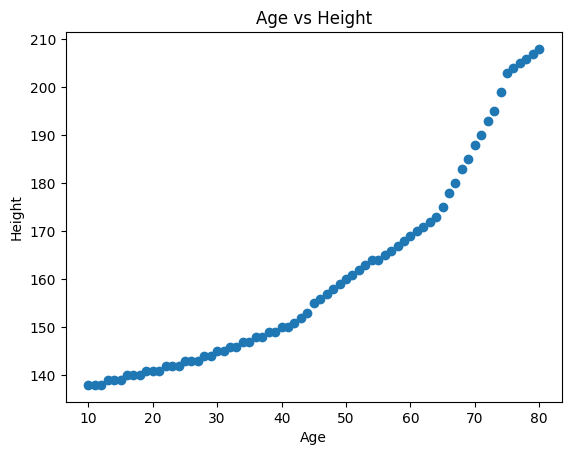

In [28]:
plt.scatter(X, y)
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Age vs Height')
plt.show()

##training (80%) and test (20%) sets

degree 1: Train RMSE = 6.37, Test RMSE = 7.59
degree 2: Train RMSE = 1.80, Test RMSE = 2.74
degree 3: Train RMSE = 1.19, Test RMSE = 1.96
degree 4: Train RMSE = 1.18, Test RMSE = 1.92


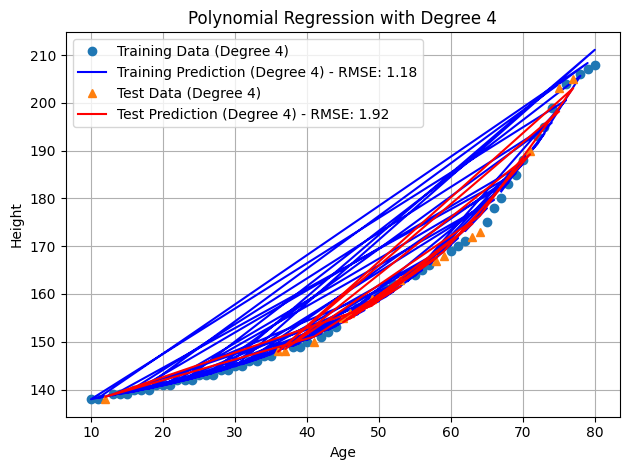

In [31]:
#Note:
#The degree controls how flexible or "curvy" the model can be.
#Higher degree = more flexibility to fit complex patterns in the data.so to find degree we can trial and error or do it in a loop to find the best at same time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)
# Step 2: Loop through polynomial degrees from 1 to 4 to evaluate different models
for degree in range(1,5):# Polynomial degrees 1, 2, 3, and 4
  poly = PolynomialFeatures(degree=degree)
##Creating Polynomial Features
# Fit and transform the training data into polynomial form
  X_train_poly = poly.fit_transform(X_train)  # Transforms X_train to include polynomial terms
  # fit_transform -Learns and applies the transformation to the training data.

# Transform the test data using the same polynomial features learned from training data
  X_test_poly = poly.transform(X_test)  # No need to fit on the test data, just transform
 # transform-Applies the same transformation to the test data (no learning here, just using what was learned from training).
# Step 4 : Train the linear regression model-reates and trains a linear regression model using the polynomial features.
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly,y_train)

# Step5: Make prediction for both the training and test sets
  y_train_pred = poly_model.predict(X_train_poly)#Prediction for the training data
  y_test_pred = poly_model.predict(X_test_poly)#Prediction for the test data

# Step 6 : Calculate RMSE(Root mean squared error)
  train_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))

# Step 7: Print the results for each degree
  print(f"degree {degree}: Train RMSE = {train_rmse:.2f}, Test RMSE = {test_rmse:.2f}")
# ploting the curve
plt.plot(X_train, y_train, 'o', label=f'Training Data (Degree {degree})')
plt.plot(X_train, y_train_pred, 'b-', label=f'Training Prediction (Degree {degree}) - RMSE: {train_rmse:.2f}')
plt.plot(X_test, y_test, '^', label=f'Test Data (Degree {degree})')
plt.plot(X_test, y_test_pred, 'r-', label=f'Test Prediction (Degree {degree}) - RMSE: {test_rmse:.2f}')

plt.xlabel('Age')
plt.ylabel('Height')
plt.title(f'Polynomial Regression with Degree {degree}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Conclusion
by doint the rmse for all the degree we can conclude that the degree 4 is the best fit with having low RMSE for both test and train.

This model can be used to accurately predict weight based on age within the given data range.